# Web Scraping

O site escolhido foi https://www.cptec.inpe.br/ e a ideia é cria uma spider que possa ser usada todos os dias para pegar as temperaturas das maiores cidades do Brasil.

<h4>PS: NÃO RODAR O NOTEBOOK INTEIRO NOVAMENTE, CONTEM INFORMAÇÕES COLHIDAS DE DIAS PASSADOS QUE NÃO ESTÃO MAIS A DISPOSIÇÃO</H4>

    Para testar use as funções e spiders com outra data.

In [18]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import folium
import branca
import seaborn as sns
import matplotlib.pyplot as plt
import re
import numpy as np

In [3]:
# função para fazer o scrap, passo a passo no final do notebook
def scrap(city, date):
    url = "https://www.cptec.inpe.br/previsao-tempo/"
    response = requests.get(url+city)
    print(response)
    # confirmar resposta
    
    soup = BeautifulSoup(response.content)
    
    # acessando cada elemento e os limpando.
    temp_min = [tempmin.text for tempmin in soup.find_all("span", {"class":"text-primary font-weight-bold"})]
    temp_min = int(temp_min[0][0:2])
    
    temp_max = [tempmax.text for tempmax in soup.find_all("span", {"class":"text-danger font-weight-bold"})]
    temp_max = int(temp_max[0][0:2])
    
    data = [data.text.strip() for data in soup.find_all("div", {"class":"col-md-4 text-center align-middle"})]
    
    nasc_sol = data[0].split()[3]
    
    por_sol = data[2].split()[3]
    
    prob_chuva = data[1].split()[3]
    prob_chuva = re.findall(r"[0-9]{1,2}", prob_chuva)
    prob_chuva = int(prob_chuva[0])
    
    iuv = int(data[3].split()[2])
    
    return [date, city, temp_min, temp_max, nasc_sol, por_sol, prob_chuva, iuv]

In [4]:
# interando a lista e a função scrap
lista_citydef = []

def intera(data):
    for i in range(len(cities)):
        lista_citydef.append(scrap(cities["city"][i], data))   

In [7]:
def arrumarDF(datasetdia):
    
    # criar colunas "UF" e "Cidade"
    datasetdia["UF"] = cities["UF"]
    datasetdia["Cidade"] = cities["Cidade"]
    for i in range(len(cities)):
        datasetdia["UF"][i] = cities["UF"][i]
        datasetdia["Cidade"][i] = cities["Cidade"][i]
    
    # arrumando valor das colunas para poder fazer análises.
    datasetdia["Data"] = pd.to_datetime(datasetdia["Data"])
    datasetdia["Nasc. Sol"] = pd.to_timedelta(datasetdia["Nasc. Sol"]+":00")
    datasetdia["Por Sol"] = pd.to_timedelta(datasetdia["Por Sol"]+":00")
    
    return datasetdia   

<br>
Outra spider para pegar a lista das cidades mais populosas do pais.
<br>

In [11]:
url2 = "https://exame.abril.com.br/brasil/as-200-cidades-mais-populosas-do-brasil/"
data2 = pd.read_html(url2)
# são duas tabelas então precisa fazer um append para conseguir as 200 cidades.
cities = data2[0].append(data2[1])
cities

,Unnamed: 0,UF,Cidade,População
0,1º,SP,São Paulo,11.895.893
1,2º,RJ,Rio de Janeiro,6.453.682
2,3º,BA,Salvador,2.902.927
3,4º,DF,Brasília,2.852.372
4,5º,CE,Fortaleza,2.571.896
...,...,...,...,...
95,196º,BA,Porto Seguro,143.282
96,197º,RJ,Maricá,143.111
97,198º,RJ,Queimados,142.709
98,199º,MG,Pouso Alegre,142.073


In [12]:
# mudando o index e drop nas colunas desnecessarias.
cities.set_index("Unnamed: 0", inplace=True)
cities.drop(["População"], axis=1, inplace=True)
cities

,UF,Cidade
Unnamed: 0,,
1º,SP,São Paulo
2º,RJ,Rio de Janeiro
3º,BA,Salvador
4º,DF,Brasília
5º,CE,Fortaleza
...,...,...
196º,BA,Porto Seguro
197º,RJ,Maricá
198º,RJ,Queimados


In [13]:
# criando a coluna para usar na função scrap()
cities["city"] = cities["UF"] +"/"+ cities["Cidade"]
cities["city"] = cities.city.str.replace(" ", "-")
cities

,UF,Cidade,city
Unnamed: 0,,,
1º,SP,São Paulo,SP/São-Paulo
2º,RJ,Rio de Janeiro,RJ/Rio-de-Janeiro
3º,BA,Salvador,BA/Salvador
4º,DF,Brasília,DF/Brasília
5º,CE,Fortaleza,CE/Fortaleza
...,...,...,...
196º,BA,Porto Seguro,BA/Porto-Seguro
197º,RJ,Maricá,RJ/Maricá
198º,RJ,Queimados,RJ/Queimados


In [27]:
# teste função
scrap("sp/sao-paulo", "19-12-2019")

<Response [200]>


['19-12-2019', 'sp/sao-paulo', 19, 23, '05:15', '18:51', 73, 13]

In [7]:
# interando a lista e a função scrap

lista_city = []
for i in range(len(cities)):
    lista_city.append(scrap(cities["city"][i], "19-12-2019"))

<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200

In [41]:
# tranformando a lista final para um DataFrame
dataset19 = pd.DataFrame([temp for temp in lista_city], columns=["Data","UF-Cidade","Temp. Min.","Temp. Max.","Nasc. Sol","Por Sol","% Chuva","IUV"])
dataset19

,Data,UF-Cidade,Temp. Min.,Temp. Max.,Nasc. Sol,Por Sol,% Chuva,IUV
0,19-12-2019,SP/São-Paulo,20,25,05:36,18:40,90,13
1,19-12-2019,RJ/Rio-de-Janeiro,23,28,05:03,18:36,87,13
2,19-12-2019,BA/Salvador,24,31,05:04,17:57,5,12
3,19-12-2019,DF/Brasília,20,25,05:36,18:40,90,13
4,19-12-2019,CE/Fortaleza,26,32,05:20,17:41,90,11
...,...,...,...,...,...,...,...,...
195,19-12-2019,BA/Porto-Seguro,23,29,04:59,18:06,5,12
196,19-12-2019,RJ/Maricá,20,25,05:36,18:40,90,13
197,19-12-2019,RJ/Queimados,24,29,05:05,18:37,87,13
198,19-12-2019,MG/Pouso-Alegre,20,30,05:15,18:45,90,13


In [42]:
dataset19["UF"] = cities["UF"]
dataset19["Cidade"] = cities["Cidade"]

for i in range(len(cities)):
    dataset19["UF"][i] = cities["UF"][i]
    dataset19["Cidade"][i] = cities["Cidade"][i]

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [43]:
#Verificando se a valores nullos
dataset19.isnull().sum()

Data          0
UF-Cidade     0
Temp. Min.    0
Temp. Max.    0
Nasc. Sol     0
Por Sol       0
% Chuva       0
IUV           0
UF            0
Cidade        0
dtype: int64

In [44]:
# arrumando valor das colunas para poder fazer análises.
dataset19["Data"] = pd.to_datetime(dataset19["Data"])
dataset19["Nasc. Sol"] = pd.to_timedelta(dataset19["Nasc. Sol"]+":00")
dataset19["Por Sol"] = pd.to_timedelta(dataset19["Por Sol"]+":00")
dataset19

,Data,UF-Cidade,Temp. Min.,Temp. Max.,Nasc. Sol,Por Sol,% Chuva,IUV,UF,Cidade
0,2019-12-19,SP/São-Paulo,20,25,05:36:00,18:40:00,90,13,SP,São Paulo
1,2019-12-19,RJ/Rio-de-Janeiro,23,28,05:03:00,18:36:00,87,13,RJ,Rio de Janeiro
2,2019-12-19,BA/Salvador,24,31,05:04:00,17:57:00,5,12,BA,Salvador
3,2019-12-19,DF/Brasília,20,25,05:36:00,18:40:00,90,13,DF,Brasília
4,2019-12-19,CE/Fortaleza,26,32,05:20:00,17:41:00,90,11,CE,Fortaleza
...,...,...,...,...,...,...,...,...,...,...
195,2019-12-19,BA/Porto-Seguro,23,29,04:59:00,18:06:00,5,12,BA,Porto Seguro
196,2019-12-19,RJ/Maricá,20,25,05:36:00,18:40:00,90,13,RJ,Maricá
197,2019-12-19,RJ/Queimados,24,29,05:05:00,18:37:00,87,13,RJ,Queimados
198,2019-12-19,MG/Pouso-Alegre,20,30,05:15:00,18:45:00,90,13,MG,Pouso Alegre


In [48]:
dataset19.groupby(["UF"])["Cidade"].count()

UF
AC     1
AL     2
AM     1
AP     1
BA    13
CE     5
DF     1
ES     6
GO     7
MA     5
MG    17
MS     2
MT     3
PA     7
PB     2
PE     8
PI     2
PR    10
RJ    22
RN     3
RO     1
RR     1
RS    12
SC    10
SE     2
SP    54
TO     2
Name: Cidade, dtype: int64

<br>
Mais de 1/4 das cidades mais populosas do país estão no estado de SP.
<br>
<br>
<br>
<br>

A partir de 11 o IUV, Índice UltraVioleta, é considerado extremo e não é aconselhado se expor ao sol nas horas proximas ao meio dia.<br>
http://tempo.folha.uol.com.br/iuv/

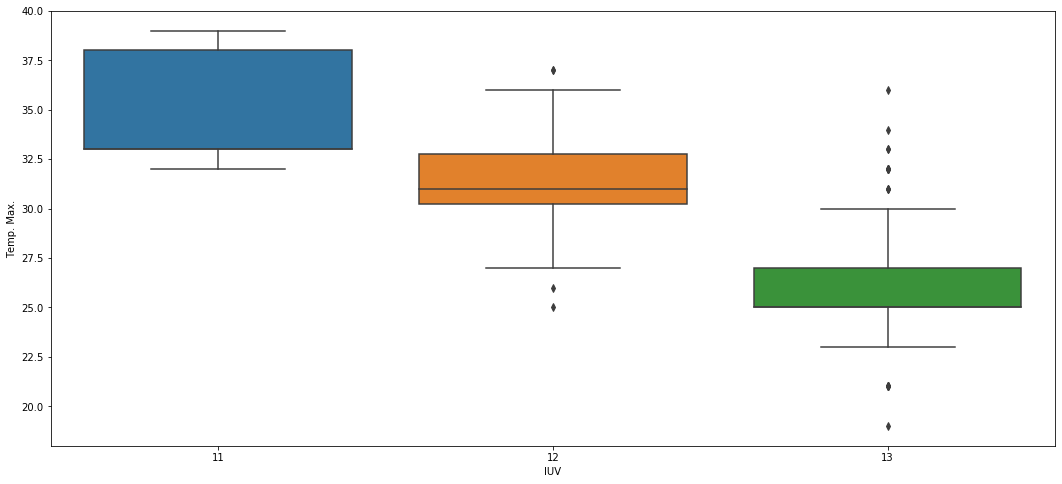

In [37]:
plt.figure(figsize=(18, 8))
sns.boxplot(data=dataset19, x="IUV", y="Temp. Max.");

Nesse grafico podemos ver que nas 200 cidades mais populosas do Brasil, o IUV é cosiderado extremo e que aparentemente não hà uma correlação entre temperatura e IUV.

In [62]:
# export
dataset19.to_csv(r"dataset19-12-2019.csv")

In [15]:
# Criando um DataFrame para o dia 20.
intera("20-12-2019")

<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200

In [17]:
dataset20 = pd.DataFrame([temp for temp in lista_citydef], columns=["Data","UF-Cidade","Temp. Min.","Temp. Max.","Nasc. Sol","Por Sol","% Chuva","IUV"])
arrumarDF(dataset20)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,Data,UF-Cidade,Temp. Min.,Temp. Max.,Nasc. Sol,Por Sol,% Chuva,IUV,UF,Cidade
0,2019-12-20,SP/São-Paulo,19,29,05:37:00,18:41:00,87,13,SP,São Paulo
1,2019-12-20,RJ/Rio-de-Janeiro,23,29,05:04:00,18:36:00,80,13,RJ,Rio de Janeiro
2,2019-12-20,BA/Salvador,24,31,05:04:00,17:58:00,5,12,BA,Salvador
3,2019-12-20,DF/Brasília,19,29,05:37:00,18:41:00,87,13,DF,Brasília
4,2019-12-20,CE/Fortaleza,26,32,05:21:00,17:41:00,7,11,CE,Fortaleza
...,...,...,...,...,...,...,...,...,...,...
195,2019-12-20,BA/Porto-Seguro,23,29,05:00:00,18:07:00,5,12,BA,Porto Seguro
196,2019-12-20,RJ/Maricá,19,29,05:37:00,18:41:00,87,13,RJ,Maricá
197,2019-12-20,RJ/Queimados,23,31,05:05:00,18:37:00,80,13,RJ,Queimados
198,2019-12-20,MG/Pouso-Alegre,21,29,05:16:00,18:46:00,90,13,MG,Pouso Alegre


<h3> Processo de crição da função scrap()<h3/>

In [16]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [17]:
#testando e lendo o link
url = "https://www.cptec.inpe.br/previsao-tempo/"
response = requests.get(url+"sp/sao-paulo")
response

<Response [200]>

In [18]:
soup = BeautifulSoup(response.content)
soup

<!DOCTYPE html>
<html lang="pt_BR">
<head>
<!-- Meta -->
<meta charset="utf-8"/>
<meta content="Centro de Previsão de Tempo e Estudos Climáticos - CPTEC/INPE - Ministério da Ciência e Tecnologia - Brasil um país de todos" name="description"/>
<meta content="previsão numérica, cptec, inpe, climática, previsão climática, desenvolvimento, tempo, clima, previsão, chuva, sol, satelite, imagens de satélite, tempo em são paulo, tempo no rio de janeiro, tempo para o sudeste, alerta, meteorologia, clima em são paulo, clima no rio de janeiro, clima para o sudeste, meio ambiente, previsão no meu site, clima no meu site, widget, selos,ondas, praias, maré, fases da lua, nascer do sol, pôr do sol, energia, agricultura, agronegócio, mudanças climáticas, amazônia, vale do paraíba, qualidade do ar, poluição, sigma, mapa interativo, sazonal , bóias oceânicas, umidade de solo" name="keywords"/>
<meta content="IE-edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1" name

In [19]:
# Foi preciso acessar primeiro o elemento da lista e depois a str, exp: n[0][0:2]

# acessando e limpando Temp Min
temp_min = [tempmin.text for tempmin in soup.find_all("span", {"class":"text-primary font-weight-bold"})]
temp_min = int(temp_min[0][0:2])
temp_min

19

In [20]:
# acessando e limpando Temp Max
temp_max = [tempmax.text for tempmax in soup.find_all("span", {"class":"text-danger font-weight-bold"})]
temp_max = int(temp_max[0][0:2])
temp_max

23

In [21]:
# acessando os outros elementos desejados de 1 vez.
data = [data.text.strip() for data in soup.find_all("div", {"class":"col-md-4 text-center align-middle"})]
data

['Nascer do sol:\xa0\n            05:15',
 'Probabilidade de chuva:\xa0\n            73%',
 'Pôr do sol:\xa0\n            18:51',
 'IUV máximo:\xa0\n            13']

In [22]:
# limpando Nasc Sol
nasc_sol = data[0].split()[3]
nasc_sol

'05:15'

In [23]:
# limpando Por Sol
por_sol = data[2].split()[3]
por_sol

'18:51'

In [30]:
# limpando Prob chuva
prob_chuva = data[1].split()[3]
prob_chuva = re.findall(r"[0-9]{2}", prob_chuva)
prob_chuva = int(prob_chuva[0])
prob_chuva

73

In [20]:
# limpando IUV
iuv = data[3].split()[2]
iuv

'13'

In [ ]:
# Notas de como achar os elementos necessarios.

"""" 
span class = text-primary font-weight-bold = temp minima
span class = text-danger font-weight-bold = temp maxima
div class = col-md-4 text-center align-middle = Nascer do sol, por do Sol, probabilidade de chuva e IUV maximo
"""
